# CNN on the MNIST Dataset

## Importing Libraries

In [12]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
import matplotlib.pyplot as plt

## Preparing the Data

In [13]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


## Peeking the Data

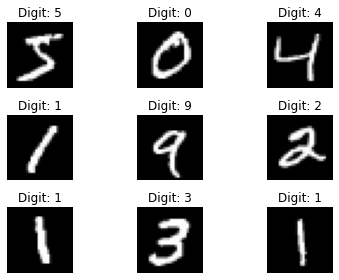

In [14]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.axis('off')
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Digit: {y_train[i]}")
plt.show()

In [15]:
rows, cols = 28, 28

x_train = x_train.reshape(x_train.shape[0],rows,cols,1)
x_test = x_test.reshape(x_test.shape[0],rows,cols,1)
x_style = (rows,cols,1)

### Normalise the data

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Handling Categorical Variables

In [17]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Defining Model Architecture

In [18]:
input_l = Input(shape=x_style)
l1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_l)
l2 = Conv2D(64, (3, 3), activation='relu')(l1)
l3 = MaxPooling2D(pool_size=(3, 3))(l2)
l4 = Dropout(0.5)(l3)
l5 = Flatten()(l4)
l6 = Dense(250, activation='sigmoid')(l5)
l7 = Dense(10, activation='softmax')(l6)

## Fitting the Data

In [19]:
model = Model([input_l], l7)
model.compile(optimizer=keras.optimizers.Adadelta(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=12,batch_size=500)

Epoch 1/12
60000/60000 [==============================] - 40s 673us/step - loss: 0.7218 - accuracy: 0.7759
Epoch 2/12
60000/60000 [==============================] - 42s 694us/step - loss: 0.2219 - accuracy: 0.9385
Epoch 3/12
60000/60000 [==============================] - 42s 696us/step - loss: 0.1344 - accuracy: 0.9618
Epoch 4/12
60000/60000 [==============================] - 42s 701us/step - loss: 0.0986 - accuracy: 0.9720
Epoch 5/12
60000/60000 [==============================] - 40s 674us/step - loss: 0.0782 - accuracy: 0.9769
Epoch 6/12
60000/60000 [==============================] - 39s 655us/step - loss: 0.0658 - accuracy: 0.9807
Epoch 7/12
60000/60000 [==============================] - 41s 687us/step - loss: 0.0580 - accuracy: 0.9828
Epoch 8/12
60000/60000 [==============================] - 41s 686us/step - loss: 0.0520 - accuracy: 0.9848
Epoch 9/12
60000/60000 [==============================] - 39s 658us/step - loss: 0.0465 - accuracy: 0.9860
Epoch 10/12
60000/60000 [============

## Evaluating the Predictions

In [20]:
results = model.evaluate(x_test,y_test,verbose=2)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")


Loss =  0.029686160761862992
Accuracy =  99.00000095367432 %


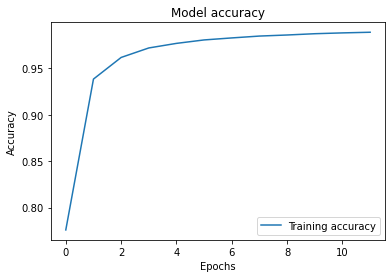

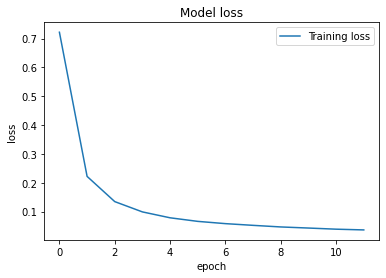

In [21]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'],label = "Training loss")
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()